In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

# Data loading and Basic information gathering

In [8]:

#loading the dataset
listings = pd.read_csv("./airbnb-open-data-in-nyc/listings_summary.csv")
calendar = pd.read_csv("./airbnb-open-data-in-nyc/calendar_detail.csv")
reviews = pd.read_csv("./airbnb-open-data-in-nyc/reviews_summary.csv")
neighbourhoods = pd.read_csv("./airbnb-open-data-in-nyc/neighbourhoods.csv")

In [25]:
print("Number of Entrees in listings = {},  Total attributes = {} " .format(listings.shape[0],listings.shape[1]))
print("Number of Entrees in calendar = {}, Total attributes = {} " .format(calendar.shape[0],calendar.shape[1]))
print("Number of Entrees in reviews = {}, Total attributes = {} " .format(reviews.shape[0],reviews.shape[1]))
print("Number of Entrees in neighbourhoods = {},  Total attributes = {} " .format(neighbourhoods.shape[0],neighbourhoods.shape[1]))

Number of Entrees in listings = 44317,  Total attributes = 16 
Number of Entrees in calendar = 16182640, Total attributes = 4 
Number of Entrees in reviews = 801784, Total attributes = 2 
Number of Entrees in neighbourhoods = 230,  Total attributes = 2 


In [26]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44317 entries, 0 to 44316
Data columns (total 16 columns):
id                                44317 non-null int64
name                              44289 non-null object
host_id                           44317 non-null int64
host_name                         44085 non-null object
neighbourhood_group               44317 non-null object
neighbourhood                     44317 non-null object
latitude                          44317 non-null float64
longitude                         44317 non-null float64
room_type                         44317 non-null object
price                             44317 non-null int64
minimum_nights                    44317 non-null int64
number_of_reviews                 44317 non-null int64
last_review                       34877 non-null object
reviews_per_month                 34843 non-null float64
calculated_host_listings_count    44317 non-null int64
availability_365                  44317 non-null int64

In [35]:
#Check the columns with no missing values
no_nulls_listings = set(listings.columns[listings.isnull().mean() == 0])
print("The columns with no null values in listings = ",no_nulls_listings )

no_nulls_calendar = set(calendar.columns[calendar.isnull().mean() == 0])
print("The columns with no null values in calendar = ",no_nulls_calendar )

no_nulls_reviews = set(reviews.columns[reviews.isnull().mean() == 0])
print("The columns with no null values in reviews = ",no_nulls_reviews )

no_nulls_neighbourhoods = set(neighbourhoods.columns[neighbourhoods.isnull().mean() == 0])
print("The columns with no null values in neighbourhoods = ",no_nulls_neighbourhoods )

The columns with no null values in listings =  {'room_type', 'id', 'longitude', 'host_id', 'availability_365', 'neighbourhood', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'neighbourhood_group', 'latitude'}
The columns with no null values in calendar =  {'available', 'listing_id', 'date'}
The columns with no null values in reviews =  {'listing_id', 'date'}
The columns with no null values in neighbourhoods =  {'neighbourhood', 'neighbourhood_group'}


# Columns with more than half missing values

In [40]:
#Check the columns with most missing values
most_nulls_listings = set(listings.columns[listings.isnull().mean() > 0.5])
print("The columns with more than half missing values in listings = ",most_nulls_listings )

most_nulls_calendar = set(calendar.columns[calendar.isnull().mean() > 0.5])
print("The columns with more than half missing values values in calendar = ",most_nulls_calendar )

most_nulls_reviews = set(reviews.columns[reviews.isnull().mean() > 0.5])
print("The columns with more than half missing values values in reviews = ",most_nulls_reviews )

most_nulls_neighbourhoods = set(neighbourhoods.columns[neighbourhoods.isnull().mean() > 0.5])
print("The columns with more than half missing values values in neighbourhoods = ",most_nulls_neighbourhoods )

The columns with more than half missing values in listings =  set()
The columns with more than half missing values values in calendar =  {'price'}
The columns with more than half missing values values in reviews =  set()
The columns with more than half missing values values in neighbourhoods =  set()


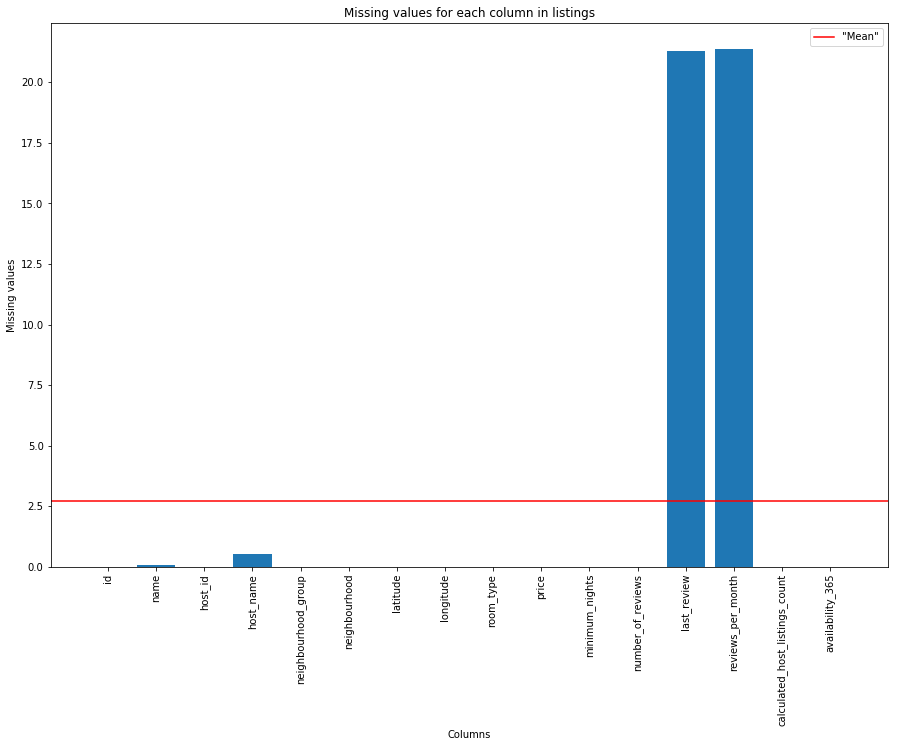

In [50]:
missing_percent = [(listings[series].isnull().sum()/len(listings[series]))*100 for series in list(listings) ]
missing_headers = [series for series in list(listings)  ]

mean = np.mean(missing_percent)
fig, ax = plt.pyplot.subplots(figsize=(15,10))
plt.pyplot.title("Missing values for each column in listings")
plt.pyplot.xlabel("Columns")
plt.pyplot.ylabel("Missing values")
plt.pyplot.axhline(y=mean, c='r', label='"Mean"')
ax.legend()
plt.pyplot.bar(missing_headers, missing_percent)
plt.pyplot.xticks(rotation=90);

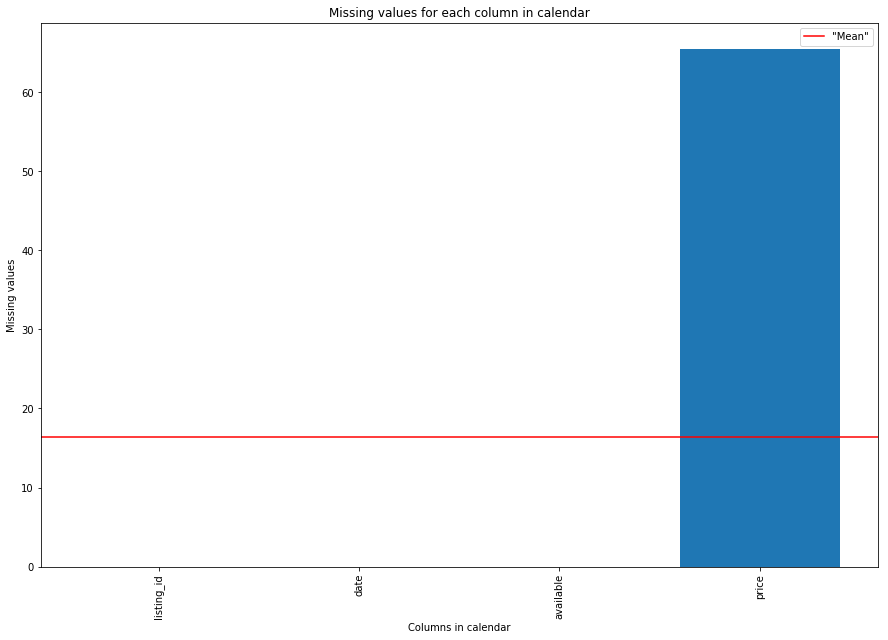

In [51]:
missing_percent = [(calendar[series].isnull().sum()/len(calendar[series]))*100 for series in list(calendar) ]
missing_headers = [series for series in list(calendar)  ]

mean = np.mean(missing_percent)
fig, ax = plt.pyplot.subplots(figsize=(15,10))
plt.pyplot.title("Missing values for each column in calendar")
plt.pyplot.xlabel("Columns in calendar")
plt.pyplot.ylabel("Missing values")
plt.pyplot.axhline(y=mean, c='r', label='"Mean"')
ax.legend()
plt.pyplot.bar(missing_headers, missing_percent)
plt.pyplot.xticks(rotation=90);